Confusion Matrix (Training Data):
 [[33 23]
 [ 8 80]]
Confusion Matrix (Test Data):
 [[10 15]
 [ 7 30]]
Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.80      0.59      0.68        56
           1       0.78      0.91      0.84        88

    accuracy                           0.78       144
   macro avg       0.79      0.75      0.76       144
weighted avg       0.79      0.78      0.78       144

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.59      0.40      0.48        25
           1       0.67      0.81      0.73        37

    accuracy                           0.65        62
   macro avg       0.63      0.61      0.60        62
weighted avg       0.64      0.65      0.63        62

The model is over fitting. It performs well on training data but poorly on test data.
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Abs

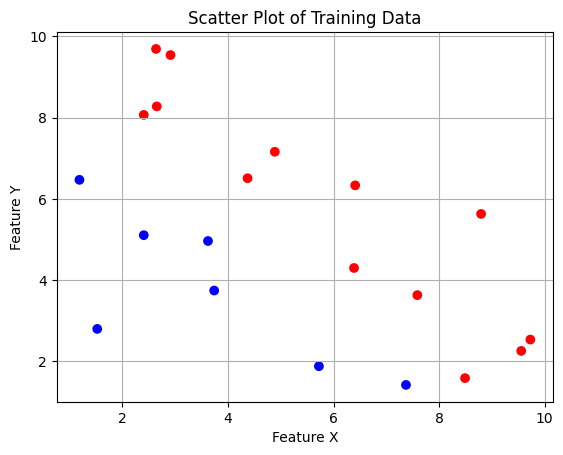

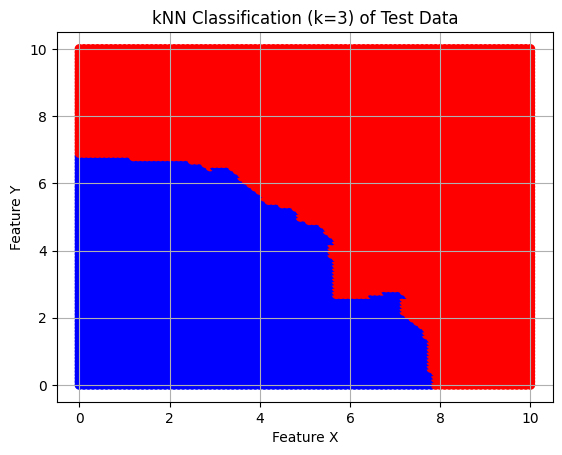

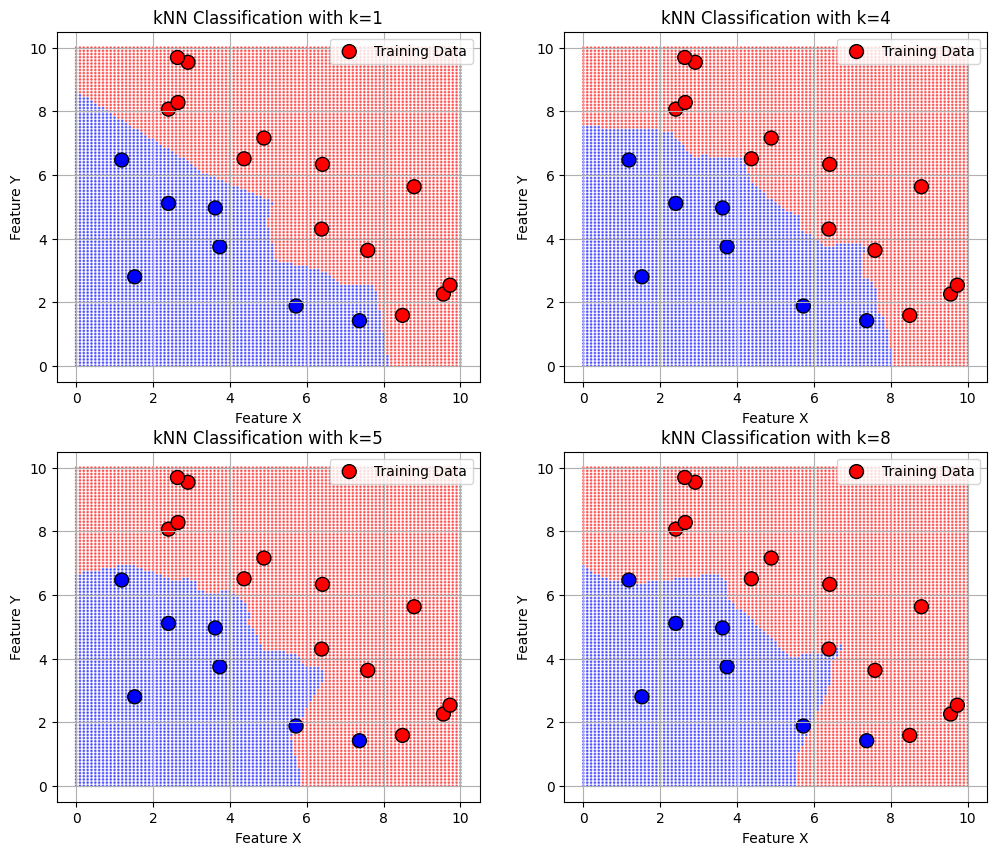

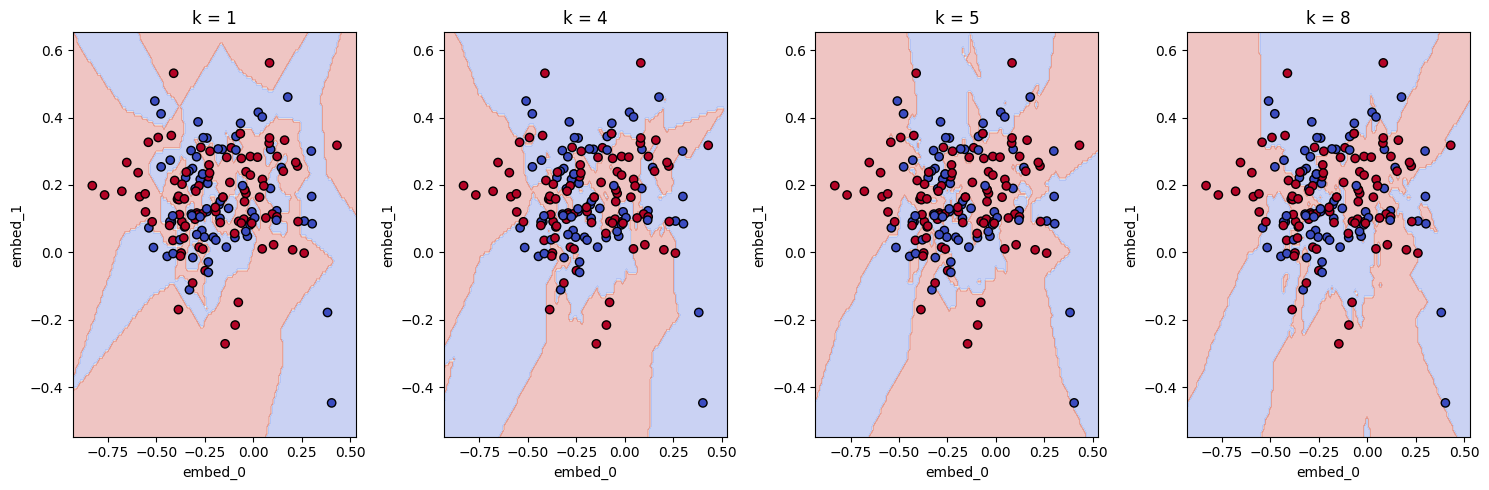

Best k: 1
Best accuracy: 0.6399621212121211


In [5]:
#A1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

def load_and_preprocess_data(filepath):
  """Loads dataset, bins output scores into classes, and removes the original output column."""
  df = pd.read_excel(filepath)
  bins = [0, 1, 2, 3, 4, 5]  # Bin edges
  labels = [0, 1, 2, 3, 4]  # Class labels
  df["class"] = pd.cut(df["output"], bins=bins, labels=labels, include_lowest=True)
  df.drop(columns=["output"], inplace=True)
  return df

def prepare_training_data(df, selected_classes, test_size=0.3, random_state=21):
  """Filters dataset to selected classes and splits into training and testing sets."""
  df = df[df["class"].isin(selected_classes)]
  X, y = df.drop(columns=["class"]).values, df["class"].values
  return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_knn_classifier(X_train, y_train, k=3):
  """Trains a k-NN classifier with given k."""
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  return knn

def evaluate_knn(knn, X_test, y_test):
  """Evaluates the k-NN classifier and returns accuracy."""
  return knn.score(X_test, y_test)


def evaluate_classification_performance(knn, X_train, X_test, y_train, y_test):
  """Computes and prints confusion matrix and classification report for train and test sets."""
  y_train_pred, y_test_pred = knn.predict(X_train), knn.predict(X_test)
  confusion_matrix_train=confusion_matrix(y_train, y_train_pred)
  confusion_matrix_test=confusion_matrix(y_test, y_test_pred)
  classification_report_train=classification_report(y_train, y_train_pred)#Classification reports as strings for printing
  classification_report_test=classification_report(y_test, y_test_pred)
  classification_report_train_dict=classification_report(y_train, y_train_pred,output_dict=True) #Classification reports as dictionaries to evaluate fitting
  classification_report_test_dict=classification_report(y_test, y_test_pred,output_dict=True)
  return confusion_matrix_train, confusion_matrix_test, classification_report_train, classification_report_test, classification_report_train_dict, classification_report_test_dict

def analyze_fit(train_report, test_report):

    # Extract precision, recall, and f1-score for class 0
    train_precision, train_recall, train_f1 = train_report["0"]["precision"], train_report["0"]["recall"], train_report["0"]["f1-score"]
    test_precision, test_recall, test_f1 = test_report["0"]["precision"], test_report["0"]["recall"], test_report["0"]["f1-score"]

    # Define thresholds
    drop_threshold = 0.15  # If test performance drops more than this, it's overfitting
    low_threshold = 0.60   # If both train and test are below this, it's underfitting

    # Check for underfitting
    if train_f1 < low_threshold and test_f1 < low_threshold:
        return "The model is underfitting. It is performing poorly on both training and test data."

    # Check for overfitting
    if train_f1 - test_f1 > drop_threshold:
        return "The model is over fitting. It performs well on training data but poorly on test data."

    # Otherwise, it's regular fit
    return "The model is regular fitted."

#A2

def load_data(file_path, sheet_name):
    # Load dataset from an Excel file.
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    return data

def segregate_data(data):
    # Segregate features (A) and target variable (C) from the dataset.
    A = np.array(data[["Candies (#)", "Mangoes (Kg)", "Milk Packets (#)"]])  # Features
    C = np.array(data[["Payment (Rs)"]])  # Target variable (total payment)
    return A, C
def calculate_pseudo_inverse(A):
    # Compute the pseudo-inverse of matrix A using NumPy's pinv function.
    return np.linalg.pinv(A)

def calculate_model_vector(A_pseudo_inv, C):
    # Compute the model vector X using the pseudo-inverse approach.
    return np.dot(A_pseudo_inv, C)

def calculate_predictions(A, X):
    # Generate predicted payment values using the model.
    return np.dot(A, X)

def evaluate_model(y_true, y_pred):
    # Compute evaluation metrics: MSE, RMSE, MAPE, and R² Score.
    mse = mean_squared_error(y_true, y_pred)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    r2 = r2_score(y_true, y_pred)  # R² Score (coefficient of determination)
    return mse, rmse, mape, r2

# A3

def generate_training_data():
    np.random.seed(42)
    X = np.random.uniform(1, 10, 20)
    Y = np.random.uniform(1, 10, 20)
    classes = np.where(X + Y < 10, 0, 1)
    return X, Y, classes

def plot_training_data(X, Y, classes):
    colors = np.array(['blue' if c == 0 else 'red' for c in classes])
    plt.scatter(X, Y, c=colors)
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title("Scatter Plot of Training Data")
    plt.grid(True)
    plt.show()

# A4

def generate_test_data():
    test_X, test_Y = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
    test_points = np.c_[test_X.ravel(), test_Y.ravel()]
    return test_points

def train_knn_classifier_with_generated_data(X, Y, classes, test_points, k=3):
    train_data = np.column_stack((X, Y))
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, classes)
    test_predictions = knn.predict(test_points)
    return test_predictions

def plot_test_classification(test_points, test_predictions):
    test_colors = np.array(['blue' if c == 0 else 'red' for c in test_predictions])
    plt.scatter(test_points[:, 0], test_points[:, 1], c=test_colors)
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title("kNN Classification (k=3) of Test Data")
    plt.grid(True)
    plt.show()

# A5

def plot_knn_variations(X, Y, classes, test_points, k_values):
    plt.figure(figsize=(12, 10))
    train_data = np.column_stack((X, Y))
    for i, k in enumerate(k_values, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_data, classes)
        test_predictions = knn.predict(test_points)
        test_colors = np.array(['blue' if c == 0 else 'red' for c in test_predictions])
        plt.subplot(2, 2, i)
        plt.scatter(test_points[:, 0], test_points[:, 1], c=test_colors, alpha=0.5, s=1)
        plt.scatter(X, Y, c=['blue' if c == 0 else 'red' for c in classes], edgecolors='black', marker='o', s=100, label="Training Data")
        plt.xlabel("Feature X")
        plt.ylabel("Feature Y")
        plt.title(f"kNN Classification with k={k}")
        plt.legend()
        plt.grid(True)
    plt.show()

# A6

def preprocess_dataset(df):
    selected_classes = [0, 1]
    df_filtered = df[df["class"].isin(selected_classes)]
    X = df_filtered[["embed_0", "embed_1"]].values
    y = df_filtered["class"].astype(int).values
    return train_test_split(X, y, test_size=0.2, random_state=42)

def generate_test_grid(X):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    test_points = np.c_[xx.ravel(), yy.ravel()]
    return xx, yy, test_points

def plot_knn_decision_boundary(X_train, y_train, test_points, xx, yy, k_values):
    fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))
    for ax, k in zip(axes, k_values):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        test_predictions = knn.predict(test_points).reshape(xx.shape)
        ax.contourf(xx, yy, test_predictions, alpha=0.3, cmap=plt.cm.coolwarm)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
        ax.set_title(f"k = {k}")
        ax.set_xlabel("embed_0")
        ax.set_ylabel("embed_1")

    plt.tight_layout()
    plt.show()

# A7

def optimize_knn(X_train, y_train):
    param_grid = {'n_neighbors': list(range(1, 26))}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_['n_neighbors'], grid_search.best_score_

# Main Execution
#A1
filepath = "/training_mathbert.xlsx"
df = load_and_preprocess_data(filepath)

# Prepare Data for Training
selected_classes=[0, 1]
X_train, X_test, y_train, y_test = prepare_training_data(df,selected_classes)

# Train k-NN
knn = train_knn_classifier(X_train, y_train, k=3)
accuracy_k3_testing = evaluate_knn(knn, X_test, y_test)
accuracy_k3_training = evaluate_knn(knn, X_train, y_train)

# Evaluate Model Performance
confusion_matrix_train, confusion_matrix_test, classification_report_train, classification_report_test, classification_report_train_dict, classification_report_test_dict=evaluate_classification_performance(knn, X_train, X_test, y_train, y_test)
print("Confusion Matrix (Training Data):\n", confusion_matrix_train)
print("Confusion Matrix (Test Data):\n", confusion_matrix_test)
print("Classification Report (Training Data):\n", classification_report_train)
print("Classification Report (Test Data):\n", classification_report_test)

# Determine the model fit

result = analyze_fit(classification_report_train_dict, classification_report_test_dict)
print(result)

#A2
df1 = load_data("/Lab Session02 Data.xlsx", "Purchase data")
# Segregate data into A (features) and C (target variable)
A, C = segregate_data(df1)
# Calculate the pseudo-inverse of A
pseudo_inv = calculate_pseudo_inverse(A)
X = calculate_model_vector(pseudo_inv, C)
C_pred = calculate_predictions(A, X)

# Evaluate model performance using error metrics
mse, rmse, mape, r2 = evaluate_model(C, C_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

#A3
X, Y, classes = generate_training_data()
plot_training_data(X, Y, classes)

#A4 - Generate test data
test_points = generate_test_data()
test_predictions = train_knn_classifier_with_generated_data(X, Y, classes, test_points)
plot_test_classification(test_points, test_predictions)

#A5 - Different k values plotting
plot_knn_variations(X, Y, classes, test_points, k_values=[1, 4, 5, 8])

#A6 - all the above operations on project dataset
X_train, X_test, y_train, y_test = preprocess_dataset(df)  #df object - contains project dataset.
xx, yy, test_points = generate_test_grid(X_train)
plot_knn_decision_boundary(X_train, y_train, test_points, xx, yy, k_values=[1, 4, 5, 8])

#A7 - Hyperparameter Tuning
best_k, best_accuracy = optimize_knn(X_train, y_train)
print(f"Best k: {best_k}")
print(f"Best accuracy: {best_accuracy}")


